In [1]:
import numpy as np
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import shutil
import glob
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import codecs
import re

In [2]:
train_dataset_path = '/content/SMS_train.csv'
test_dataset_path = '/content/SMS_test.csv'

df_train = pd.read_csv(train_dataset_path, encoding='latin1')
df_test = pd.read_csv(test_dataset_path, encoding='latin1')

In [3]:
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [4]:
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [5]:
df_train["Label"] = df_train["Label"].map({"Non-Spam":0,"Spam":1})
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,0
1,2,The guy did some bitching but I acted like i'd...,0
2,3,"Pity, * was in mood for that. So...any other s...",0
3,4,Will ü b going to esplanade fr home?,0
4,5,This is the 2nd time we have tried 2 contact u...,1


In [6]:
df_test["Label"] = df_test["Label"].map({"Non-Spam":0,"Spam":1})
df_test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",1
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",1
2,3,Congrats! Nokia 3650 video camera phone is you...,1
3,4,URGENT! Your Mobile number has been awarded wi...,1
4,5,Someone has contacted our dating service and e...,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        957 non-null    int64 
 1   Message_body  957 non-null    object
 2   Label         957 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.6+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        125 non-null    int64 
 1   Message_body  125 non-null    object
 2   Label         125 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [9]:
df_train.shape

(957, 3)

In [10]:
df_test.shape

(125, 3)

In [11]:
df_train.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [12]:
df_test.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

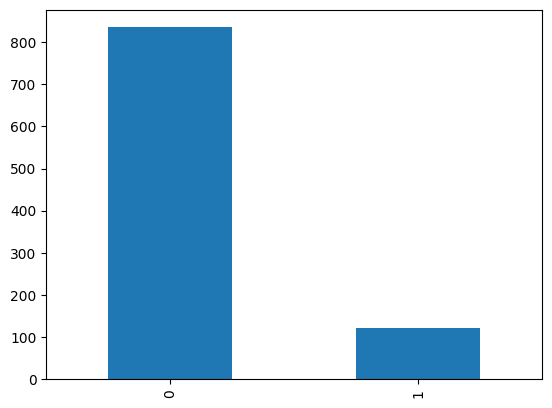

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

category_counts = df_train['Label'].value_counts()
labels = category_counts.index.tolist()

category_counts.plot(kind='bar')
plt.show()

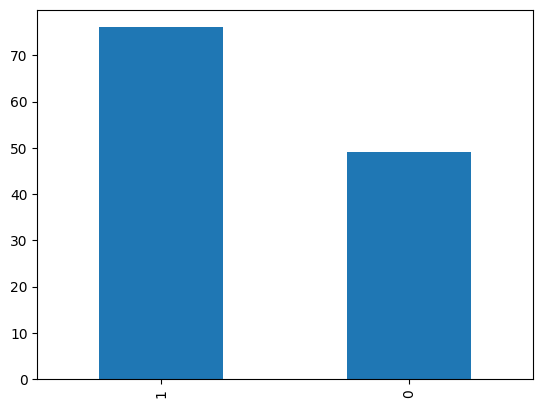

In [14]:
category_counts = df_test['Label'].value_counts()
labels = category_counts.index.tolist()

category_counts.plot(kind='bar')
plt.show()

In [15]:
df_train.duplicated().sum()

0

In [16]:
df_test.duplicated().sum()

0

In [17]:
df_train["Label"].unique()

array([0, 1])

In [18]:
df_test["Label"].unique()

array([1, 0])

In [19]:
df_train["Message_body"] = df_train["Message_body"].str.lower()
df_train.head()

,S. No.,Message_body,Label
0,1,rofl. its true to its name,0
1,2,the guy did some bitching but i acted like i'd...,0
2,3,"pity, * was in mood for that. so...any other s...",0
3,4,will ü b going to esplanade fr home?,0
4,5,this is the 2nd time we have tried 2 contact u...,1


In [20]:
df_test["Message_body"] = df_test["Message_body"].str.lower()
df_test.head()

,S. No.,Message_body,Label
0,1,"upgrdcentre orange customer, you may now claim...",1
1,2,"loan for any purpose £500 - £75,000. homeowner...",1
2,3,congrats! nokia 3650 video camera phone is you...,1
3,4,urgent! your mobile number has been awarded wi...,1
4,5,someone has contacted our dating service and e...,1


In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop = stopwords.words('english')
df_train["Message_body"] = df_train["Message_body"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,S. No.,Message_body,Label
0,1,rofl. true name,0
1,2,guy bitching acted like i'd interested buying ...,0
2,3,"pity, * mood that. so...any suggestions?",0
3,4,ü b going esplanade fr home?,0
4,5,2nd time tried 2 contact u. u £750 pound prize...,1


In [22]:
df_test["Message_body"] = df_test["Message_body"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test.head()

,S. No.,Message_body,Label
0,1,"upgrdcentre orange customer, may claim free ca...",1
1,2,"loan purpose £500 - £75,000. homeowners + tena...",1
2,3,congrats! nokia 3650 video camera phone call 0...,1
3,4,urgent! mobile number awarded £2000 prize guar...,1
4,5,someone contacted dating service entered phone...,1


In [23]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_train['Message_body'] = df_train['Message_body'].apply(remove_urls)

df_train.head()

,S. No.,Message_body,Label
0,1,rofl. true name,0
1,2,guy bitching acted like i'd interested buying ...,0
2,3,"pity, * mood that. so...any suggestions?",0
3,4,ü b going esplanade fr home?,0
4,5,2nd time tried 2 contact u. u £750 pound prize...,1


In [24]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_test['Message_body'] = df_test['Message_body'].apply(remove_urls)

df_test.head()

,S. No.,Message_body,Label
0,1,"upgrdcentre orange customer, may claim free ca...",1
1,2,"loan purpose £500 - £75,000. homeowners + tena...",1
2,3,congrats! nokia 3650 video camera phone call 0...,1
3,4,urgent! mobile number awarded £2000 prize guar...,1
4,5,someone contacted dating service entered phone...,1


In [25]:
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df_train['Message_body']= df_train['Message_body'].apply(lambda x: clean_punctuations(x))
df_train.head()

,S. No.,Message_body,Label
0,1,rofl true name,0
1,2,guy bitching acted like id interested buying s...,0
2,3,pity mood that soany suggestions,0
3,4,ü b going esplanade fr home,0
4,5,2nd time tried 2 contact u u £750 pound prize ...,1


In [26]:
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df_test['Message_body']= df_test['Message_body'].apply(lambda x: clean_punctuations(x))
df_test.head()

,S. No.,Message_body,Label
0,1,upgrdcentre orange customer may claim free cam...,1
1,2,loan purpose £500 £75000 homeowners tenants ...,1
2,3,congrats nokia 3650 video camera phone call 09...,1
3,4,urgent mobile number awarded £2000 prize guara...,1
4,5,someone contacted dating service entered phone...,1


In [27]:
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
df_train['Message_body']= df_train['Message_body'].apply(lambda x: clean_repeating_char(x))
df_train.head()

,S. No.,Message_body,Label
0,1,rofl true name,0
1,2,guy bitching acted like id interested buying s...,0
2,3,pity mood that soany suggestions,0
3,4,ü b going esplanade fr home,0
4,5,2nd time tried 2 contact u u £750 pound prize ...,1


In [28]:
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
df_test['Message_body']= df_test['Message_body'].apply(lambda x: clean_repeating_char(x))
df_test.head()

,S. No.,Message_body,Label
0,1,upgrdcentre orange customer may claim free cam...,1
1,2,loan purpose £500 £7500 homeowners tenants w...,1
2,3,congrats nokia 3650 video camera phone call 09...,1
3,4,urgent mobile number awarded £200 prize guaran...,1
4,5,someone contacted dating service entered phone...,1


In [29]:
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
df_train['Message_body']= df_train['Message_body'].apply(lambda x: remove_hashtag(x))
df_train.head()

,S. No.,Message_body,Label
0,1,rofl true name,0
1,2,guy bitching acted like id interested buying s...,0
2,3,pity mood that soany suggestions,0
3,4,ü b going esplanade fr home,0
4,5,2nd time tried 2 contact u u £750 pound prize ...,1


In [30]:
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
df_test['Message_body']= df_test['Message_body'].apply(lambda x: remove_hashtag(x))
df_test.head()

,S. No.,Message_body,Label
0,1,upgrdcentre orange customer may claim free cam...,1
1,2,loan purpose £500 £7500 homeowners tenants w...,1
2,3,congrats nokia 3650 video camera phone call 09...,1
3,4,urgent mobile number awarded £200 prize guaran...,1
4,5,someone contacted dating service entered phone...,1


In [31]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df_train['Message_body']= df_train['Message_body'].apply(lambda x: clean_username(x))
df_train.head()

,S. No.,Message_body,Label
0,1,rofl true name,0
1,2,guy bitching acted like id interested buying s...,0
2,3,pity mood that soany suggestions,0
3,4,ü b going esplanade fr home,0
4,5,2nd time tried 2 contact u u £750 pound prize ...,1


In [32]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
df_test['Message_body']= df_test['Message_body'].apply(lambda x: clean_username(x))
df_test.head()

,S. No.,Message_body,Label
0,1,upgrdcentre orange customer may claim free cam...,1
1,2,loan purpose £500 £7500 homeowners tenants w...,1
2,3,congrats nokia 3650 video camera phone call 09...,1
3,4,urgent mobile number awarded £200 prize guaran...,1
4,5,someone contacted dating service entered phone...,1


In [33]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [34]:
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!


Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wordnet/noun.exc  
  inflating: /root/nltk_data/corpora/wordnet/verb.exc  
  inflating: /root/nltk_data/corpora/wordnet/README  
  inflating: /root/nltk_data/corpora/wordnet/index.sense  
  inflating: /root/nltk_data/corpora/wordnet/data.noun  
  inflating: /root/nltk_data/corpora/wordnet/data.adv  


In [35]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_train['Message_body'] = df_train['Message_body'].apply(lemmatizeRows)

df_train.head()

,S. No.,Message_body,Label
0,1,rofl true name,0
1,2,guy bitching acted like id interested buying s...,0
2,3,pity mood that soany suggestion,0
3,4,ü b going esplanade fr home,0
4,5,2nd time tried 2 contact u u £750 pound prize ...,1


In [36]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_test['Message_body'] = df_test['Message_body'].apply(lemmatizeRows)

df_test.head()

,S. No.,Message_body,Label
0,1,upgrdcentre orange customer may claim free cam...,1
1,2,loan purpose £500 £7500 homeowner tenant welco...,1
2,3,congrats nokia 3650 video camera phone call 09...,1
3,4,urgent mobile number awarded £200 prize guaran...,1
4,5,someone contacted dating service entered phone...,1


In [37]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_train['Message_body'] = df_train['Message_body'].apply(stemRows)

df_train.head()

,S. No.,Message_body,Label
0,1,rofl true name,0
1,2,guy bitch act like id interest buy someth els ...,0
2,3,piti mood that soani suggest,0
3,4,ü b go esplanad fr home,0
4,5,2nd time tri 2 contact u u £750 pound prize 2 ...,1


In [38]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df_test['Message_body'] = df_test['Message_body'].apply(stemRows)

df_test.head()

,S. No.,Message_body,Label
0,1,upgrdcentr orang custom may claim free camera ...,1
1,2,loan purpos £500 £7500 homeown tenant welcom p...,1
2,3,congrat nokia 3650 video camera phone call 090...,1
3,4,urgent mobil number award £200 prize guarante ...,1
4,5,someon contact date servic enter phone fanci y...,1


Text(0, 0.5, 'Frequency')

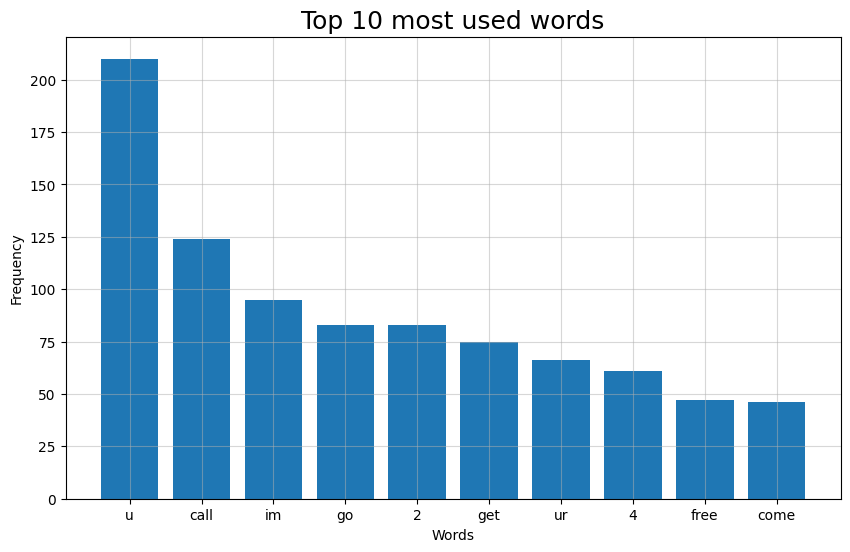

In [39]:
import collections
words = []
for text in df_train['Message_body']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

plt.figure(figsize = (10, 6))

plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))

plt.grid(alpha = 0.5)

plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

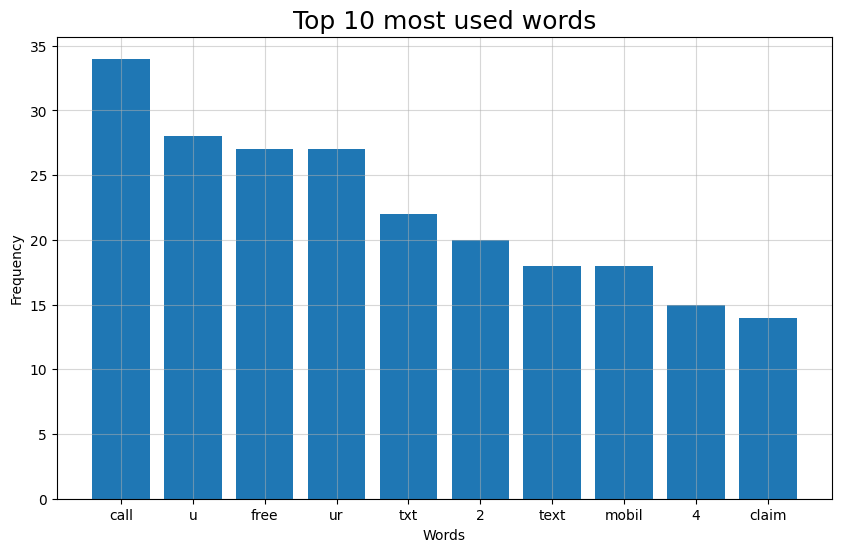

In [40]:
words = []
for text in df_test['Message_body']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

plt.figure(figsize = (10, 6))

plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))

plt.grid(alpha = 0.5)

plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')


In [42]:
def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

df_train['Message_body'] = df_train['Message_body'].apply(remove_stopwords)
df_test['Message_body'] = df_test['Message_body'].apply(remove_stopwords)

In [44]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def normalize_text(text):
    stemmer = SnowballStemmer("english")
    normalized_text = []
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        normalized_text.append(stemmed_word)

    return ' '.join(normalized_text)

df_train['Message_body'] = df_train['Message_body'].apply(normalize_text)
df_test['Message_body'] = df_test['Message_body'].apply(normalize_text)

In [46]:
max_words = 10000

max_len = 200

tokenizer = Tokenizer(num_words = max_words)

tokenizer.fit_on_texts(df_train['Message_body'])

sequences_train = tokenizer.texts_to_sequences(df_train['Message_body'])
sequences_val = tokenizer.texts_to_sequences(df_test['Message_body'])

word_index = tokenizer.word_index

In [47]:
data_train = pad_sequences(sequences_train, maxlen = max_len)
data_val = pad_sequences(sequences_val, maxlen = max_len)

In [48]:

model = tf.keras.Sequential()
model.add(Embedding(max_words, 16, input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
